# Exploring the Relationship Between Screen Time Patterns and Insomnia-Related Sleep Disturbances

In [724]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

## Data Loading and Cleaning

In [725]:
df = pd.read_csv('C:\\Users\\Blix\\Documents\\GitHub\\CCDATSCL_PROJECT\\merged_dataset.csv')

In [726]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Date                             91 non-null     object
 1   Total Screen Time                91 non-null     int64 
 2   Total Number of Notifications    91 non-null     int64 
 3   Total Number of Unlocks          91 non-null     int64 
 4   Social Media Usage               91 non-null     int64 
 5   Video App Usage                  91 non-null     int64 
 6   Games Usage                      91 non-null     int64 
 7   0 to 6                           91 non-null     int64 
 8   6 to 12                          91 non-null     int64 
 9   12 to 18                         91 non-null     int64 
 10  18 to 24                         91 non-null     int64 
 11  Sleep Start (Time Previous Day)  91 non-null     int64 
 12  Sleep End (Time Waken)           91 no

In [727]:
df.head()

,Date,Total Screen Time,Total Number of Notifications,Total Number of Unlocks,Social Media Usage,Video App Usage,Games Usage,0 to 6,6 to 12,12 to 18,18 to 24,Sleep Start (Time Previous Day),Sleep End (Time Waken),Sleep Duration,Sleep Quality,Steps
0,10/27/2025,584,545,108,208,285,42,148,75,192,163,3,10,7,2,5810
1,10/28/2025,777,521,78,259,553,0,154,30,292,340,3,10,7,2,1185
2,10/29/2025,882,440,55,152,598,202,115,243,294,300,2,11,9,3,463
3,10/30/2025,627,471,56,163,332,177,45,283,209,135,1,5,4,2,9111
4,10/31/2025,778,308,60,121,476,106,0,225,247,231,24,6,6,3,4024


In [728]:
df.describe()

,Total Screen Time,Total Number of Notifications,Total Number of Unlocks,Social Media Usage,Video App Usage,Games Usage,0 to 6,6 to 12,12 to 18,18 to 24,Sleep Start (Time Previous Day),Sleep End (Time Waken),Sleep Duration,Sleep Quality,Steps
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,551.813187,420.318681,78.879121,143.516484,320.483516,58.208791,69.131868,123.604396,187.021978,173.681319,9.065934,7.989011,6.549451,2.670330,6176.098901
std,167.445309,89.966522,26.782596,51.020772,141.790406,73.050594,78.377464,66.751925,86.382737,79.643634,9.832827,1.669960,2.212408,0.882609,3717.266224
min,123.000000,254.000000,19.000000,32.000000,57.000000,0.000000,0.000000,0.000000,44.000000,0.000000,1.000000,4.000000,1.000000,1.000000,36.000000
25%,442.000000,349.000000,56.500000,107.500000,211.000000,4.500000,0.000000,75.000000,121.500000,126.000000,2.000000,7.000000,5.000000,2.000000,3045.500000
50%,543.000000,410.000000,78.000000,135.000000,307.000000,27.000000,44.000000,120.000000,177.000000,173.000000,3.000000,8.000000,6.000000,2.000000,5832.000000
75%,672.500000,479.000000,93.500000,174.500000,416.500000,97.000000,114.000000,165.000000,247.000000,232.500000,23.000000,9.000000,8.000000,3.000000,9347.500000
max,912.000000,673.000000,158.000000,274.000000,847.000000,311.000000,329.000000,312.000000,360.000000,340.000000,24.000000,12.000000,12.000000,4.000000,16342.000000


In [729]:
# Check first and last date in the dataset in terms of Timestamp
df['Date'] = pd.to_datetime(df['Date'])
print("First date in dataset:", df['Date'].min())
print("Last date in dataset:", df['Date'].max())

First date in dataset: 2025-10-27 00:00:00
Last date in dataset: 2026-01-25 00:00:00


In [730]:
df.isna().sum()

Date                               0
Total Screen Time                  0
Total Number of Notifications      0
Total Number of Unlocks            0
Social Media Usage                 0
Video App Usage                    0
Games Usage                        0
0 to 6                             0
6 to 12                            0
12 to 18                           0
18 to 24                           0
Sleep Start (Time Previous Day)    0
Sleep End (Time Waken)             0
Sleep Duration                     0
Sleep Quality                      0
Steps                              0
dtype: int64

In [731]:
df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis

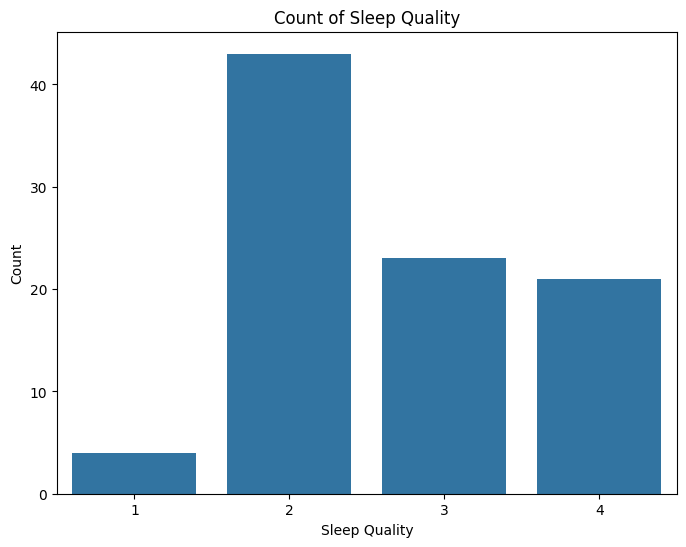

In [732]:
# Plot count plot of Sleep Quality
plt.figure(figsize=(8, 6))
sns.countplot(x='Sleep Quality', data=df)
plt.title('Count of Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Count')
plt.show()

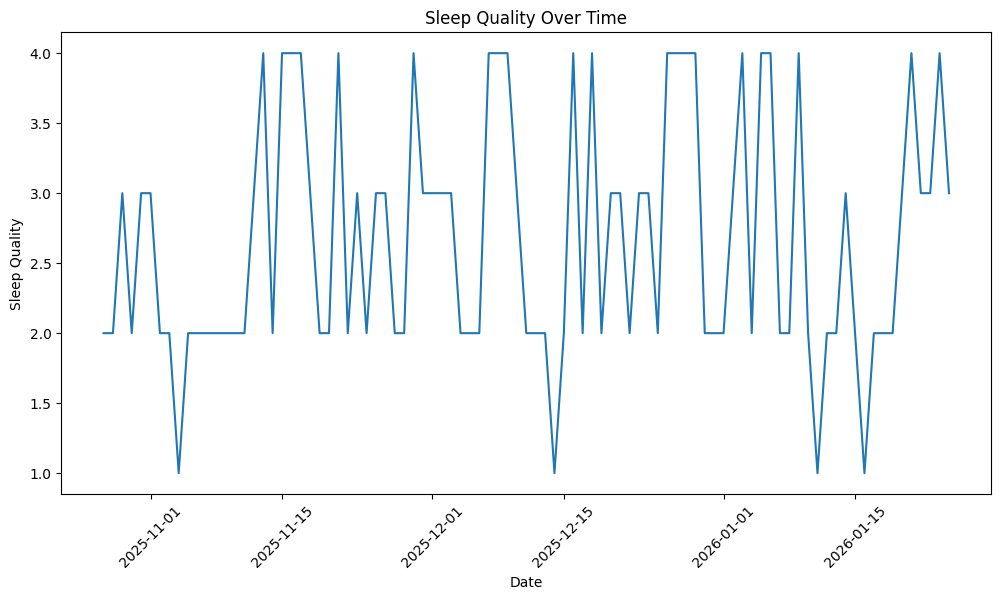

In [733]:
# Plot time series of Sleep Quality over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sleep Quality', data=df)
plt.title('Sleep Quality Over Time')
plt.xlabel('Date')
plt.ylabel('Sleep Quality')
plt.xticks(rotation=45)
plt.show()

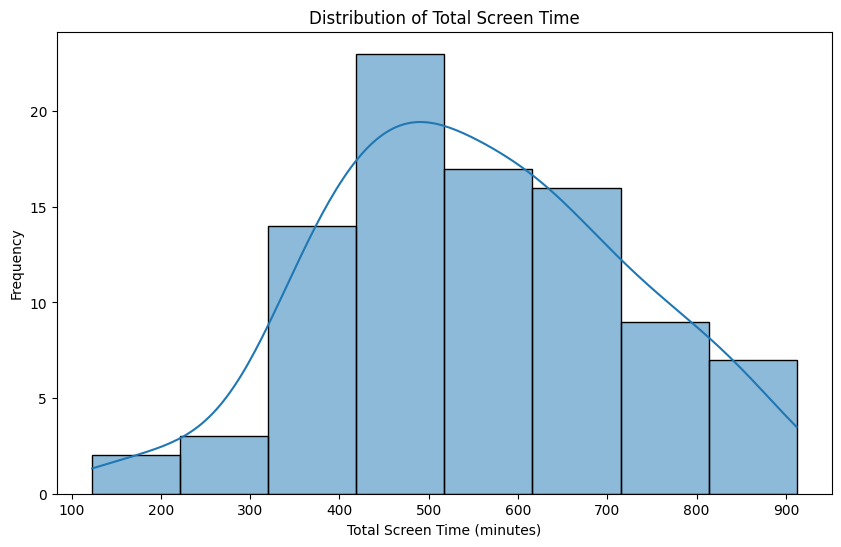

In [734]:
# Plot distribution of Total Screen Time with histogram and KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Screen Time'], kde=True)
plt.title('Distribution of Total Screen Time')
plt.xlabel('Total Screen Time (minutes)')
plt.ylabel('Frequency')
plt.show()

In [735]:
# Check skewness and kurtosis of Total Screen Time
print("Skewness of Total Screen Time:", df['Total Screen Time'].skew())
print("Kurtosis of Total Screen Time:", df['Total Screen Time'].kurtosis())

Skewness of Total Screen Time: 0.035421218195492765
Kurtosis of Total Screen Time: -0.3417423834909239


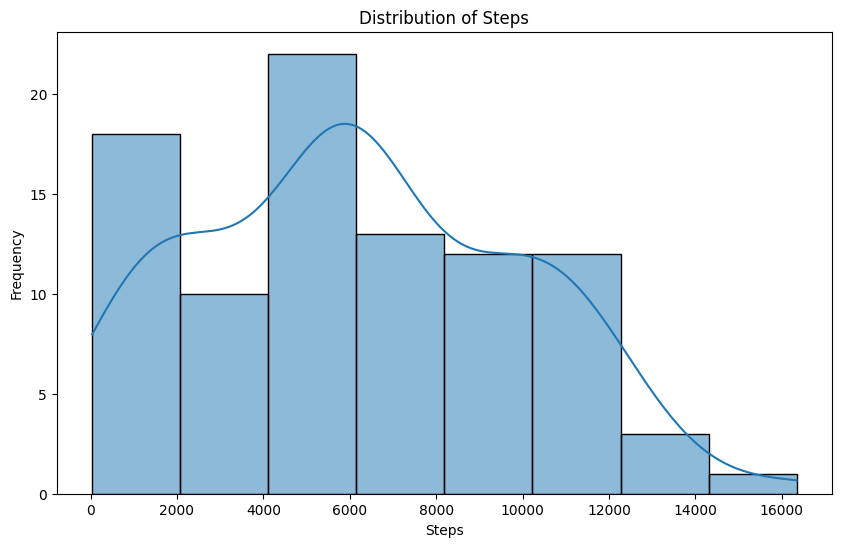

Skewness of Steps: 0.23281473994294494
Kurtosis of Steps: -0.6526694665833843


In [736]:
# Plot distribution of Steps with histogram and KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['Steps'], kde=True)
plt.title('Distribution of Steps')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.show()
# Check skewness and kurtosis of Steps
print("Skewness of Steps:", df['Steps'].skew())
print("Kurtosis of Steps:", df['Steps'].kurtosis())


In [737]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             91 non-null     datetime64[ns]
 1   Total Screen Time                91 non-null     int64         
 2   Total Number of Notifications    91 non-null     int64         
 3   Total Number of Unlocks          91 non-null     int64         
 4   Social Media Usage               91 non-null     int64         
 5   Video App Usage                  91 non-null     int64         
 6   Games Usage                      91 non-null     int64         
 7   0 to 6                           91 non-null     int64         
 8   6 to 12                          91 non-null     int64         
 9   12 to 18                         91 non-null     int64         
 10  18 to 24                         91 non-null     int64         


Text(0, 0.5, 'Screen Time (minutes)')

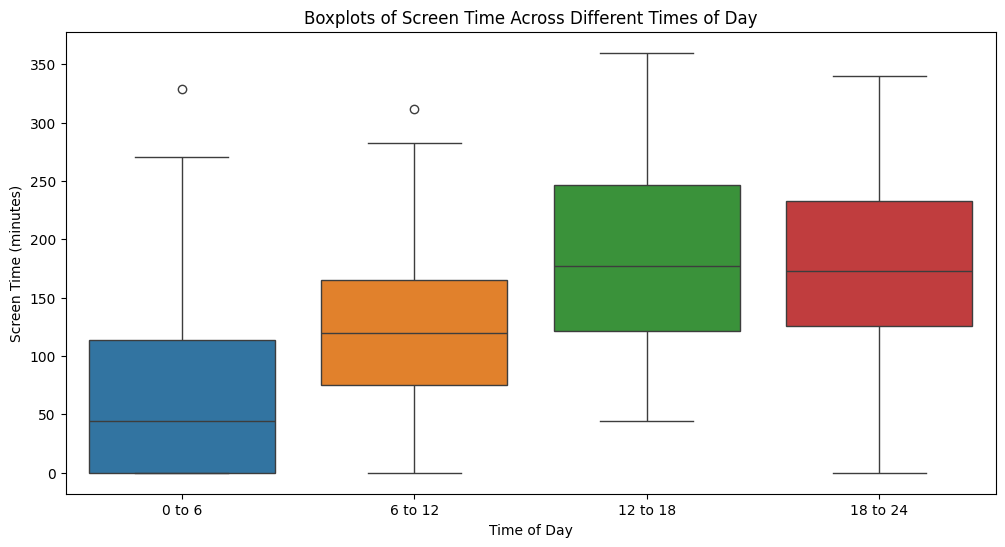

In [738]:
# Plot boxplots of 0 to 6, 6 to 12, 12 to 18, and 18 to 24 features to check Screen Time distribution across different times of day in one plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['0 to 6', '6 to 12', '12 to 18', '18 to 24']])
plt.title('Boxplots of Screen Time Across Different Times of Day')
plt.xlabel('Time of Day')
plt.ylabel('Screen Time (minutes)')

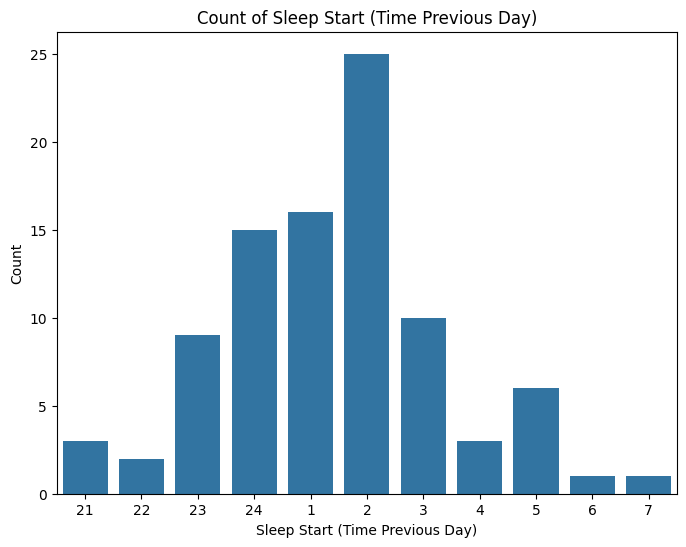

In [739]:
# Check countplot of Sleep Start (Time Previous Day). Arrange it from 21, 22, 23, 24, 1, 2, 3, 4, 5, 6, 7
plt.figure(figsize=(8, 6))
sns.countplot(x='Sleep Start (Time Previous Day)', data=df, order=[21, 22, 23, 24, 1, 2, 3, 4, 5, 6, 7])
plt.title('Count of Sleep Start (Time Previous Day)')
plt.xlabel('Sleep Start (Time Previous Day)')
plt.ylabel('Count')
plt.show()

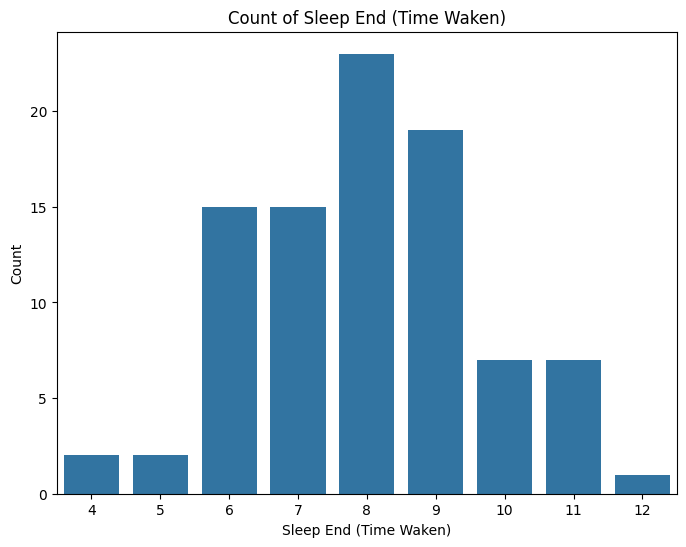

In [740]:
# Check countplot of Sleep End (Time Waken).
plt.figure(figsize=(8, 6))
sns.countplot(x='Sleep End (Time Waken)', data=df)
plt.title('Count of Sleep End (Time Waken)')
plt.xlabel('Sleep End (Time Waken)')
plt.ylabel('Count')
plt.show()

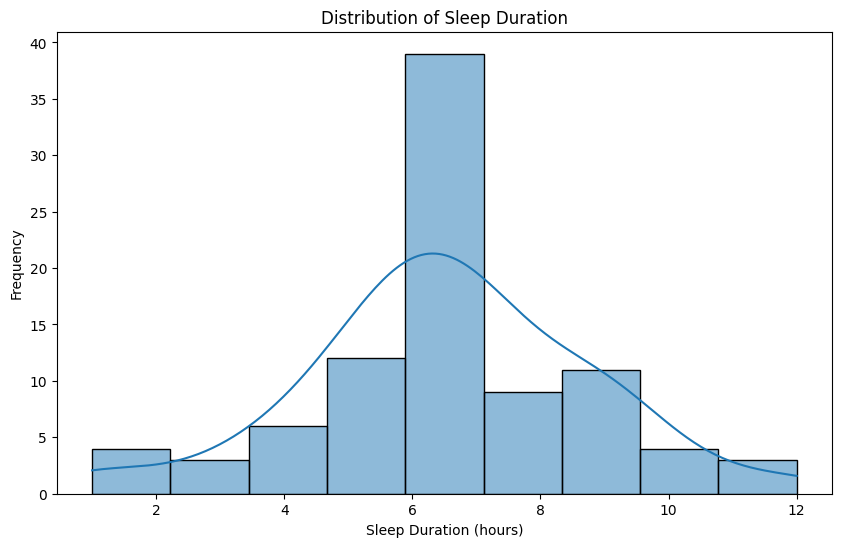

Skewness of Sleep Duration: -0.12719071862139555
Kurtosis of Sleep Duration: 0.48461291062895206


In [741]:
# Check distribution of Sleep Duration with histogram and KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep Duration'], kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()
# Check skewness and kurtosis of Sleep Duration
print("Skewness of Sleep Duration:", df['Sleep Duration'].skew())
print("Kurtosis of Sleep Duration:", df['Sleep Duration'].kurtosis())

## Feature Engineering

In [742]:
# Create a feature for the day of the week
df['DayOfWeek'] = df['Date'].dt.day_name()

In [743]:
# Create steps intensity feature. Sedentary: < 5000, Active >= 5000 and <= 10000, Very Active > 10000
def categorize_steps(steps):
    if steps < 5000:
        return 'Sedentary'
    elif 5000 <= steps <= 10000:
        return 'Active'
    else:
        return 'Very Active'

df['StepsIntensity'] = df['Steps'].apply(categorize_steps)

In [744]:
'''
Create a feature for sleep onset minutes from midnight. Sleep Start is recorded as the hour (0-24). 
If Sleep Start ranges from 0 to 6, we will assume the person went to sleep after midnight and calculate minutes from midnight and is a positive value. 
If Sleep Start ranges from 20 to 24, we will assume the person went to sleep before midnight and calculate minutes from midnight accordingly and is a negative value. 
''' 
def calculate_sleep_onset_minutes_since_midnight(sleep_start):
    if 0 <= sleep_start <= 12:
        return sleep_start * 60
    elif 12 < sleep_start <= 24:
        return (sleep_start - 24) * 60
    else:
        return np.nan  # Invalid value

df['SleepOnsetMinutes'] = df['Sleep Start (Time Previous Day)'].apply(calculate_sleep_onset_minutes_since_midnight)
# Convert Sleep Duration from hours to minutes
df['SleepDurationMinutes'] = df['Sleep Duration'] * 60

In [745]:
# Create a feature that stores the 0 to 6 screen time for tomorrow
df['Previous_Sleep_18_24_ScreenTime'] = df['18 to 24'].shift(1)
df['Pre_Sleep_0_6_ScreenTime'] = df['0 to 6'].shift(-1)

In [746]:
df['Effective Evening Screen Time'] = df['18 to 24'] + df['Pre_Sleep_0_6_ScreenTime']
df['Daytime Screen Time'] = df['6 to 12'] + df['12 to 18']

In [747]:
# Remove Previous_Sleep_18_24_ScreenTime and Pre_Sleep_0_6_ScreenTime features
df.drop(['Previous_Sleep_18_24_ScreenTime', 'Pre_Sleep_0_6_ScreenTime'], axis=1, inplace=True)

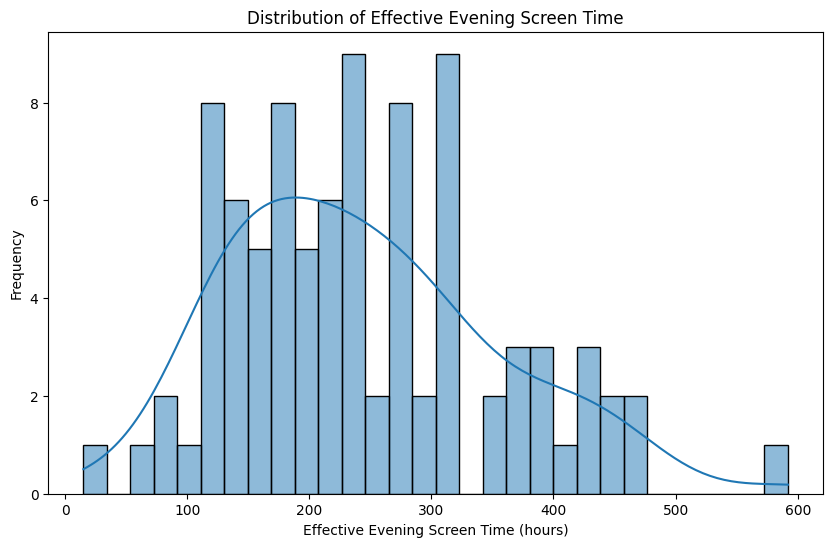

In [748]:
# Show histogram of Effective Evening Screen Time
plt.figure(figsize=(10, 6))
sns.histplot(df['Effective Evening Screen Time'], bins=30, kde=True)
plt.title('Distribution of Effective Evening Screen Time')
plt.xlabel('Effective Evening Screen Time (hours)')
plt.ylabel('Frequency')
plt.show()

In [749]:
df['Sleep Quality'].value_counts()

Sleep Quality
2    43
3    23
4    21
1     4
Name: count, dtype: int64

In [750]:
# Create target feature for sleep quality by shifting Sleep Quality by -1 day
df['SleepQualityNextDay'] = df['Sleep Quality'].shift(-1)
df['SleepQualityNextNextDay'] = df['Sleep Quality'].shift(-2)

In [751]:
# Create a feature for Interactive Screen Time by summing up Gaming and Social Media Screen Time
df['InteractiveScreenTime'] = df['Games Usage'] + df['Social Media Usage']
df['NonInteractiveScreenTime'] = df['Video App Usage']

In [752]:
# Drop Total Number of Notifications and Total Number of Unlocks, as they may not be relevant to the analysis
df.drop(columns=['Total Number of Notifications', 'Total Number of Unlocks'], inplace=True)

In [753]:
# Create Feature for High and Low Evening Screen Time. Low is <240 mins, High is >=240 mins
df['Evening Screen Time Category'] = df['Effective Evening Screen Time'].apply(lambda x: 'Low' if x < 240 else 'High')

In [754]:
# Check null values
df.isna().sum()

Date                               0
Total Screen Time                  0
Social Media Usage                 0
Video App Usage                    0
Games Usage                        0
0 to 6                             0
6 to 12                            0
12 to 18                           0
18 to 24                           0
Sleep Start (Time Previous Day)    0
Sleep End (Time Waken)             0
Sleep Duration                     0
Sleep Quality                      0
Steps                              0
DayOfWeek                          0
StepsIntensity                     0
SleepOnsetMinutes                  0
SleepDurationMinutes               0
Effective Evening Screen Time      1
Daytime Screen Time                0
SleepQualityNextDay                1
SleepQualityNextNextDay            2
InteractiveScreenTime              0
NonInteractiveScreenTime           0
Evening Screen Time Category       0
dtype: int64

In [755]:
df.dropna(inplace=True)

In [756]:
# Export to csv
df.to_csv('C:\\Users\\Blix\\Documents\\GitHub\\CCDATSCL_PROJECT\\processed_dataset.csv', index=False)

In [757]:
print(df.describe())

                      Date  Total Screen Time  Social Media Usage  \
count                   89          89.000000           89.000000   
mean   2025-12-10 00:00:00         551.134831          144.494382   
min    2025-10-27 00:00:00         123.000000           32.000000   
25%    2025-11-18 00:00:00         438.000000          109.000000   
50%    2025-12-10 00:00:00         543.000000          136.000000   
75%    2026-01-01 00:00:00         671.000000          175.000000   
max    2026-01-23 00:00:00         912.000000          274.000000   
std                    NaN         168.588673           51.167089   

       Video App Usage  Games Usage      0 to 6     6 to 12    12 to 18  \
count         89.00000    89.000000   89.000000   89.000000   89.000000   
mean         319.05618    58.786517   70.516854  122.741573  184.404494   
min           57.00000     0.000000    0.000000    0.000000   44.000000   
25%          209.00000     3.000000    0.000000   75.000000  121.000000   
50%

## Post Processing Visualizations

Spearman's Rank Correlation: -0.1730, p-value: 0.1050


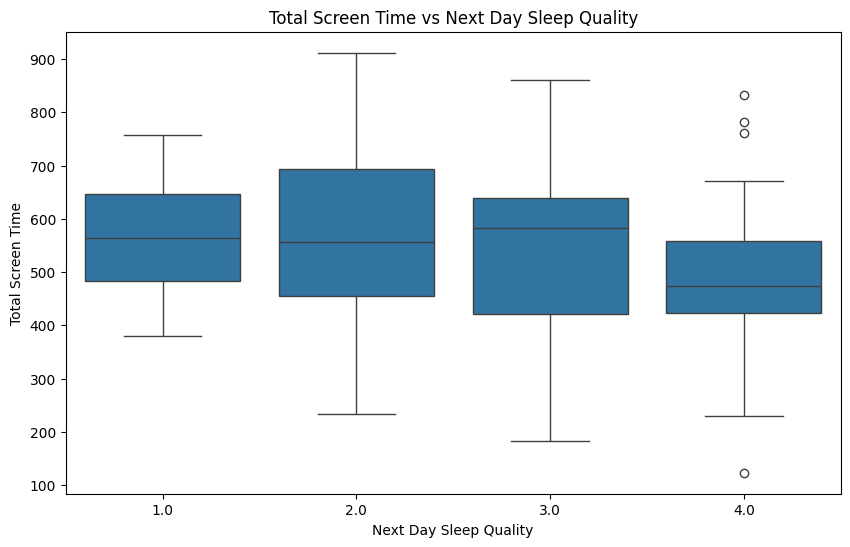

In [758]:
# Print Spearman's Rank Correlation between Total Screen Time and Target_Sleep_Quality
spearman_corr, p_value = stats.spearmanr(df['Total Screen Time'], df['SleepQualityNextDay'], nan_policy='omit')
print(f"Spearman's Rank Correlation: {spearman_corr:.4f}, p-value: {p_value:.4f}")
# Box Plot for Total Screen Time and Target_Sleep_Quality
plt.figure(figsize=(10, 6))
sns.boxplot(y='Total Screen Time', x='SleepQualityNextDay', data=df)
plt.title('Total Screen Time vs Next Day Sleep Quality')
plt.xlabel('Next Day Sleep Quality')
plt.ylabel('Total Screen Time')
plt.show()

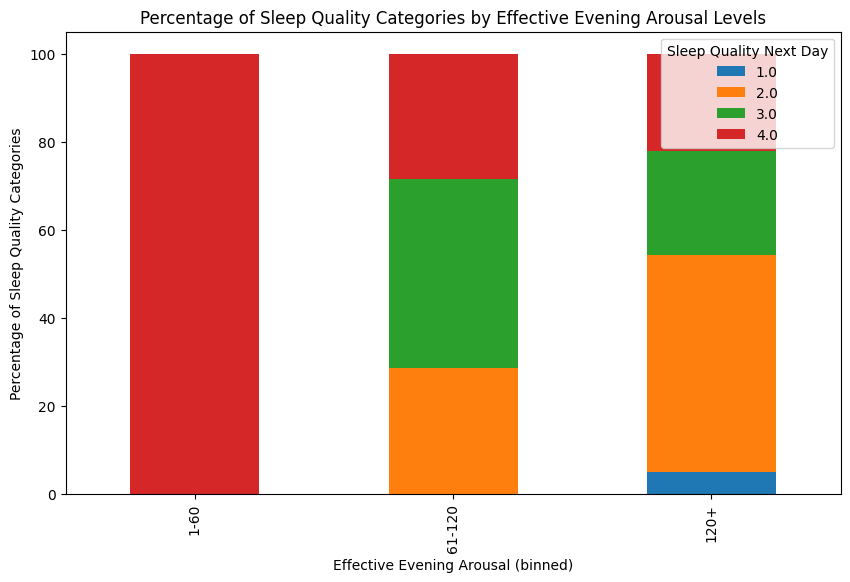

In [759]:
# Stacked Bar Chart for Showing the Percentage of Sleep Quality Categories for Different Levels of Effective Evening Screen Time
# Create bins for Effective Evening Screen Time
df['Effective Evening Screen Time Bin'] = pd.cut(df['Effective Evening Screen Time'], bins=[-1, 0, 60, 120, np.inf], labels=['0', '1-60', '61-120', '120+'])
# Create a crosstab of Sleep Quality categories by Evening Screen Time bins
crosstab = pd.crosstab(df['Effective Evening Screen Time Bin'], df['SleepQualityNextDay'], normalize='index') * 100
# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of Sleep Quality Categories by Effective Evening Arousal Levels')
plt.xlabel('Effective Evening Arousal (binned)')
plt.ylabel('Percentage of Sleep Quality Categories')
plt.legend(title='Sleep Quality Next Day')
plt.show()

In [760]:
# Check number of values for each bin of Effective Evening Screen Time
print(df['Effective Evening Screen Time Bin'].value_counts())

Effective Evening Screen Time Bin
120+      81
61-120     7
1-60       1
0          0
Name: count, dtype: int64


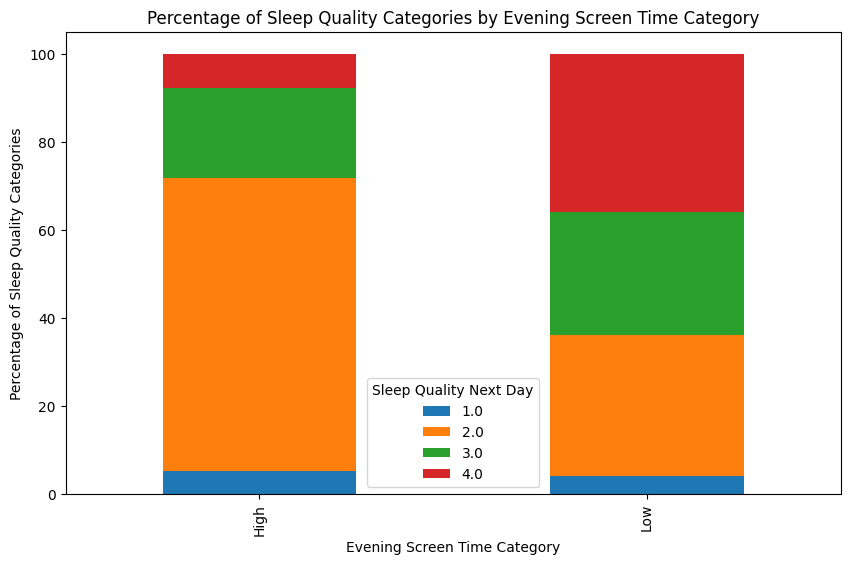

In [761]:
# Stacked Bar Chart for Showing the Proportion of Sleep Quality Categories for Different Levels of Evening Screen Time Category
crosstab = pd.crosstab(df['Evening Screen Time Category'], df['SleepQualityNextDay'], normalize='index') * 100
# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of Sleep Quality Categories by Evening Screen Time Category')
plt.xlabel('Evening Screen Time Category')
plt.ylabel('Percentage of Sleep Quality Categories')
plt.legend(title='Sleep Quality Next Day')
plt.show()

In [762]:
# Check the number of sleep start time per Pre Sleep Bin
print(df.groupby('Evening Screen Time Category')['Sleep Start (Time Previous Day)'].value_counts())

Evening Screen Time Category  Sleep Start (Time Previous Day)
High                          2                                  13
                              1                                   7
                              24                                  7
                              3                                   4
                              5                                   3
                              23                                  3
                              4                                   1
                              7                                   1
Low                           2                                  12
                              1                                   8
                              24                                  8
                              3                                   6
                              23                                  5
                              5                       

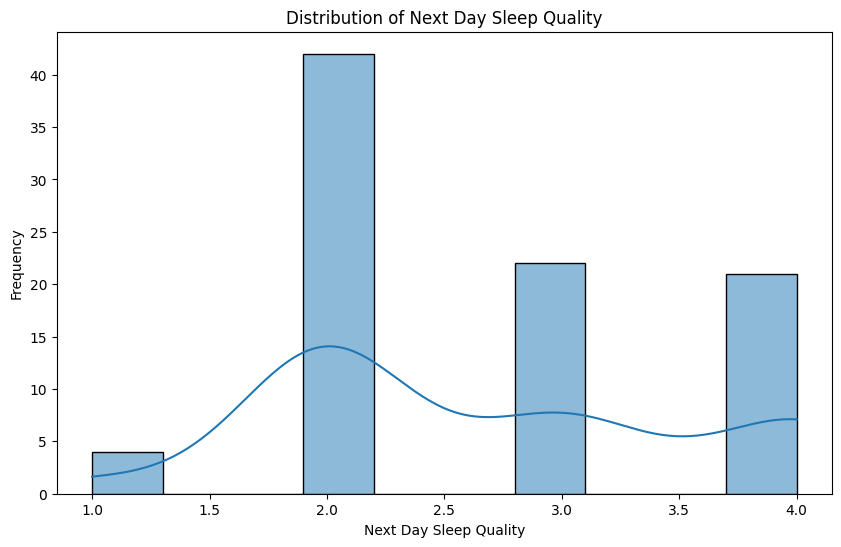

In [763]:
# Plot distribution of Sleep Quality Next-Day
plt.figure(figsize=(10, 6))
sns.histplot(df['SleepQualityNextDay'].dropna(), bins=10, kde=True)
plt.title('Distribution of Next Day Sleep Quality')
plt.xlabel('Next Day Sleep Quality')
plt.ylabel('Frequency')
plt.show()

In [764]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 0 to 88
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               89 non-null     datetime64[ns]
 1   Total Screen Time                  89 non-null     int64         
 2   Social Media Usage                 89 non-null     int64         
 3   Video App Usage                    89 non-null     int64         
 4   Games Usage                        89 non-null     int64         
 5   0 to 6                             89 non-null     int64         
 6   6 to 12                            89 non-null     int64         
 7   12 to 18                           89 non-null     int64         
 8   18 to 24                           89 non-null     int64         
 9   Sleep Start (Time Previous Day)    89 non-null     int64         
 10  Sleep End (Time Waken)             89 non-nul

In [765]:
df.describe()

,Date,Total Screen Time,Social Media Usage,Video App Usage,Games Usage,0 to 6,6 to 12,12 to 18,18 to 24,Sleep Start (Time Previous Day),...,Sleep Quality,Steps,SleepOnsetMinutes,SleepDurationMinutes,Effective Evening Screen Time,Daytime Screen Time,SleepQualityNextDay,SleepQualityNextNextDay,InteractiveScreenTime,NonInteractiveScreenTime
count,89,89.000000,89.000000,89.00000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,...,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.00000
mean,2025-12-10 00:00:00,551.134831,144.494382,319.05618,58.786517,70.516854,122.741573,184.404494,175.134831,9.000000,...,2.651685,6195.629213,86.966292,391.011236,243.988764,307.146067,2.674157,2.685393,203.280899,319.05618
min,2025-10-27 00:00:00,123.000000,32.000000,57.00000,0.000000,0.000000,0.000000,44.000000,0.000000,1.000000,...,1.000000,36.000000,-180.000000,60.000000,15.000000,56.000000,1.000000,1.000000,32.000000,57.00000
25%,2025-11-18 00:00:00,438.000000,109.000000,209.00000,3.000000,0.000000,75.000000,121.000000,129.000000,2.000000,...,2.000000,2900.000000,0.000000,300.000000,155.000000,239.000000,2.000000,2.000000,133.000000,209.00000
50%,2025-12-10 00:00:00,543.000000,136.000000,297.00000,27.000000,45.000000,114.000000,175.000000,173.000000,3.000000,...,2.000000,5889.000000,120.000000,360.000000,231.000000,307.000000,2.000000,2.000000,186.000000,297.00000
75%,2026-01-01 00:00:00,671.000000,175.000000,416.00000,98.000000,115.000000,165.000000,247.000000,234.000000,23.000000,...,3.000000,9376.000000,120.000000,480.000000,308.000000,369.000000,3.000000,3.000000,250.000000,416.00000
max,2026-01-23 00:00:00,912.000000,274.000000,847.00000,311.000000,329.000000,312.000000,360.000000,340.000000,24.000000,...,4.000000,16342.000000,420.000000,720.000000,592.000000,672.000000,4.000000,4.000000,450.000000,847.00000
std,NaN,168.588673,51.167089,142.97881,73.724837,78.696210,66.994492,85.110185,79.112433,9.794479,...,0.880355,3756.933546,118.632401,133.280676,110.415485,116.681146,0.889015,0.886714,96.797702,142.97881


In [766]:
# Scale Steps and Total Screen Time
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
df[['Steps', 'Total Screen Time']] = scaler.fit_transform(df[['Steps', 'Total Screen Time']])

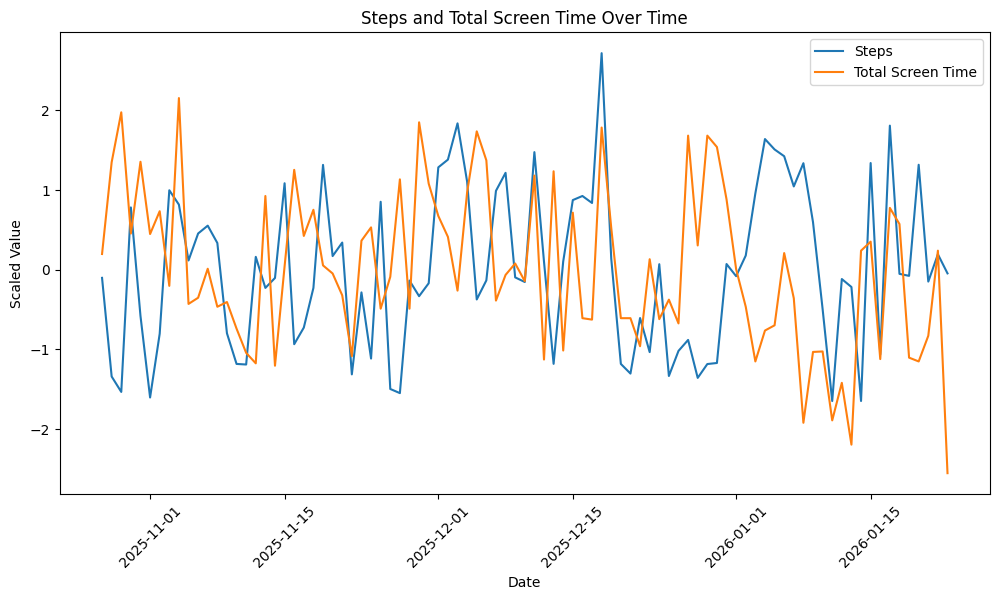

In [767]:
# Plot time series of Steps and Total Screen Time over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Steps', data=df, label='Steps')
sns.lineplot(x='Date', y='Total Screen Time', data=df, label='Total Screen Time')
plt.title('Steps and Total Screen Time Over Time')
plt.xlabel('Date')
plt.ylabel('Scaled Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Statistical Tests

In [768]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Create new features with scaled values for Effective Evening Screen Time, Total Screen Time, and Daytime Screen Time
df[['Effective Evening Screen Time', 'Daytime Screen Time']] = scaler.fit_transform(df[['Effective Evening Screen Time', 'Daytime Screen Time']])

In [769]:
# Perform a Independent-Samples T-test for the following question:
# Is there a significant difference in self-reported sleep quality when exceeding the 120-minute pre-sleep screen time threshold?
# Ho: There is no statistically significant difference in the distribution of sleep quality scores between days characterized by high (>120 mins) and low (<=120 mins) evening screen time.
# Ha: Sleep quality scores are significantly higher on days characterized by low evening screen time compared to days with high evening screen time.
# Use Shapiro Wilk test to check normality of Sleep Quality Next-Day for all
low_screen_time = df[df['Evening Screen Time Category'] == 'Low']['SleepQualityNextDay'].dropna()
high_screen_time = df[df['Evening Screen Time Category'] == 'High']['SleepQualityNextDay'].dropna()
shapiro_low = stats.shapiro(low_screen_time)
shapiro_high = stats.shapiro(high_screen_time)
print(f"Shapiro-Wilk Test for Low Evening Screen Time: W={shapiro_low.statistic:.4f}, p-value={shapiro_low.pvalue:.4f}")
print(f"Shapiro-Wilk Test for High Evening Screen Time: W={shapiro_high.statistic:.4f}, p-value={shapiro_high.pvalue:.4f}")

# Since both p-values are less than 0.05, we reject the null hypothesis of normality.
# Therefore, we will use the non-parametric Mann-Whitney U test instead of the t-test.
mannwhitney_result = stats.mannwhitneyu(low_screen_time, high_screen_time, alternative='greater')
print(f"Mann-Whitney U Test: U={mannwhitney_result.statistic}, p-value={mannwhitney_result.pvalue:.4f}")

Shapiro-Wilk Test for Low Evening Screen Time: W=0.8328, p-value=0.0000
Shapiro-Wilk Test for High Evening Screen Time: W=0.7410, p-value=0.0000
Mann-Whitney U Test: U=1365.0, p-value=0.0003


In [770]:
# Drop null values
df.dropna(subset=['Effective Evening Screen Time', 'SleepQualityNextNextDay'], inplace=True)

In [771]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
# Fit Ordered Logistic Regression
# We model Sleep Quality as the dependent variable
df['SleepQualityNextDay'] = df['SleepQualityNextDay'].dropna()
model = OrderedModel(df['SleepQualityNextDay'], 
                     df[['Total Screen Time', 'Effective Evening Screen Time']], 
                     distr='logit')
res = model.fit(method='bfgs')

# 4. Results
print(res.summary())
# Calculate and print odds ratios
params = res.params
odds_ratios = np.exp(params)
print("\nOdds Ratios:")
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 1.013551
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
                              OrderedModel Results                             
Dep. Variable:     SleepQualityNextDay   Log-Likelihood:                -90.206
Model:                    OrderedModel   AIC:                             190.4
Method:             Maximum Likelihood   BIC:                             202.9
Date:                 Sat, 14 Feb 2026                                         
Time:                         23:09:42                                         
No. Observations:                   89                                         
Df Residuals:                       84                                         
Df Model:                            2                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
----------

In [772]:
# 4. STATISTICAL COMPARISON (Spearman Correlation)
# Assessing the strength of association for both
rho_total, p_total = stats.spearmanr(df['Total Screen Time'], df['SleepQualityNextDay'], nan_policy='omit')
rho_evening, p_evening = stats.spearmanr(df['Effective Evening Screen Time'], df['SleepQualityNextDay'], nan_policy='omit')

print(f"Total Screen Time (TST) Correlation: {rho_total:.3f} (p={p_total:.4f})")
print(f"Evening Screen Time (TEA) Correlation: {rho_evening:.3f} (p={p_evening:.4f})")

# 5. STEP 2 ANALYSIS: WHICH IS STRONGER?
if abs(rho_evening) > abs(rho_total):
    print("\nCONCLUSION: Evening Screen Time is more strongly associated with sleep disturbances.")
else:
    print("\nCONCLUSION: Total Daily Volume is more strongly associated with sleep disturbances.")

Total Screen Time (TST) Correlation: -0.173 (p=0.1050)
Evening Screen Time (TEA) Correlation: -0.421 (p=0.0000)

CONCLUSION: Evening Screen Time is more strongly associated with sleep disturbances.


In [773]:
import numpy as np
from scipy import stats

def steigers_z_test(r13, r23, r12, n):
    """
    r13: Correlation between Effective Evening Screen Time and Sleep Quality
    r23: Correlation between Total Screen Time and Sleep Quality
    r12: Correlation between Effective Evening Screen Time and Total Screen Time (the overlap)
    n: Sample size (number of days)
    """
    # 1. Calculate the determinant of the correlation matrix
    # This accounts for the dependency between the two screen metrics
    determinant = 1 - r13**2 - r23**2 - r12**2 + 2*r13*r23*r12
    
    # 2. Calculate the average correlation
    f = (r12 - (r13 * r23) / 2) / (1 - ((r13 + r23) / 2)**2)
    
    # 3. Calculate the Z-statistic
    # This formula assesses if the difference is larger than what we'd expect by chance
    z_num = (r13 - r23) * np.sqrt(n - 3)
    z_den = np.sqrt(2 * (1 - r12)**3 * (1 + f))
    
    z_stat = z_num / z_den
    p_value = 2 * (1 - stats.norm.cdf(np.abs(z_stat))) # Two-tailed p-value
    
    return z_stat, p_value

# --- Workflow for Objective 2 ---

# 1. Clean and Align Data (as we did before)
df_clean = df[['Effective Evening Screen Time', 'Total Screen Time', 'SleepQualityNextDay']].dropna()
n = len(df_clean)

# 2. Calculate the three necessary correlations (Spearman)
r13, _ = stats.spearmanr(df_clean['Effective Evening Screen Time'], df_clean['SleepQualityNextDay'])
r23, _ = stats.spearmanr(df_clean['Total Screen Time'], df_clean['SleepQualityNextDay'])
r12, _ = stats.spearmanr(df_clean['Effective Evening Screen Time'], df_clean['Total Screen Time'])

# 3. Execute Steiger's Z
z_stat, p_val = steigers_z_test(r13, r23, r12, n)

print(f"Correlation (Evening & Sleep): {r13:.3f}")
print(f"Correlation (Total & Sleep): {r23:.3f}")
print(f"Correlation between Predictors (The Overlap): {r12:.3f}")
print("-" * 30)
print(f"Steiger's Z Statistic: {z_stat:.4f}")
print(f"Steiger's p-value: {p_val:.4f}")

if p_val < 0.05:
    print("\nCONCLUSION: Evening Screen Time has a significantly stronger association with sleep quality than Total Screen Time.")
else:
    print("\nCONCLUSION: There is no significant difference in the strength of association between Evening Screen Time and Total Screen Time with sleep quality.")

Correlation (Evening & Sleep): -0.421
Correlation (Total & Sleep): -0.173
Correlation between Predictors (The Overlap): 0.739
------------------------------
Steiger's Z Statistic: -9.1934
Steiger's p-value: 0.0000

CONCLUSION: Evening Screen Time has a significantly stronger association with sleep quality than Total Screen Time.


In [774]:
# Correlational Analysis of Evening Screen Time and Sleep Quality Next-Next-Day
rho_next_next, p_next_next = stats.spearmanr(df['Effective Evening Screen Time'], df['SleepQualityNextNextDay'], nan_policy='omit')
print(f"Spearman's Rank Correlation (Evening Screen Time vs Sleep Quality Next-Next-Day): {rho_next_next:.4f}, p-value: {p_next_next:.4f}")

Spearman's Rank Correlation (Evening Screen Time vs Sleep Quality Next-Next-Day): -0.1833, p-value: 0.0855


In [775]:
# Correlational Analysis of Total Screen Time and Sleep Quality Next-Next-Day
rho_total_next_next, p_total_next_next = stats.spearmanr(df['Total Screen Time'], df['SleepQualityNextNextDay'], nan_policy='omit')
print(f"Spearman's Rank Correlation (Total Screen Time vs Sleep Quality Next-Next-Day): {rho_total_next_next:.4f}, p-value: {p_total_next_next:.4f}")

Spearman's Rank Correlation (Total Screen Time vs Sleep Quality Next-Next-Day): -0.0227, p-value: 0.8329


In [776]:
# Correlational Analysis of Interactive Screen Time and Sleep Quality Next-Next-Day
rho_interactive_next_next, p_interactive_next_next = stats.spearmanr(df['InteractiveScreenTime'], df['SleepQualityNextNextDay'], nan_policy='omit')
print(f"Spearman's Rank Correlation (Interactive Screen Time vs Sleep Quality Next-Next-Day): {rho_interactive_next_next:.4f}, p-value: {p_interactive_next_next:.4f}")

Spearman's Rank Correlation (Interactive Screen Time vs Sleep Quality Next-Next-Day): -0.0452, p-value: 0.6744


In [777]:
# Perform Cross-Lagged Correlation Analysis to Assess Temporal Relationships
# Correlation of Evening Screen Time with Sleep Quality Next-Day
rho_evening_next, p_evening_next = stats.spearmanr(df['Effective Evening Screen Time'], df['SleepQualityNextDay'], nan_policy='omit')
print(f"Spearman's Rank Correlation (Evening Screen Time vs Sleep Quality Next-Day): {rho_evening_next:.4f}, p-value: {p_evening_next:.4f}")
rho_evening_next_next, p_evening_next_next = stats.spearmanr(df['Effective Evening Screen Time'], df['SleepQualityNextNextDay'], nan_policy='omit')
print(f"Spearman's Rank Correlation (Evening Screen Time vs Sleep Quality Next-Next-Day): {rho_evening_next_next:.4f}, p-value: {p_evening_next_next:.4f}")

Spearman's Rank Correlation (Evening Screen Time vs Sleep Quality Next-Day): -0.4211, p-value: 0.0000
Spearman's Rank Correlation (Evening Screen Time vs Sleep Quality Next-Next-Day): -0.1833, p-value: 0.0855


In [ ]:
import pandas as pd
from scipy import stats

# 4. THE TEST:
# Run Spearman because we are dealing with a 1-4 scale
rho_evening, p_val = stats.spearmanr(df['Effective Evening Screen Time'], df['SleepQualityNextNextDay'])
rho_total, p_total = stats.spearmanr(df['Total Screen Time'], df['SleepQualityNextNextDay'])
rho_interactive, p_interactive = stats.spearmanr(df['InteractiveScreenTime'], df['SleepQualityNextNextDay'])
rho_noninteractive, p_noninteractive = stats.spearmanr(df['NonInteractiveScreenTime'], df['SleepQualityNextNextDay'])
rho_social, p_social = stats.spearmanr(df['Social Media Usage'], df['SleepQualityNextNextDay'])
rho_games, p_games = stats.spearmanr(df['Games Usage'], df['SleepQualityNextNextDay'])
rho_06, p_06 = stats.spearmanr(df['0 to 6'], df['SleepQualityNextNextDay'])
rho_612, p_612 = stats.spearmanr(df['6 to 12'], df['SleepQualityNextNextDay'])
rho_1218, p_1218 = stats.spearmanr(df['12 to 18'], df['SleepQualityNextNextDay'])
rho_1824, p_1824 = stats.spearmanr(df['18 to 24'], df['SleepQualityNextNextDay'])

print(f"Temporal (Lagged) Correlation (Evening Screen Time): {rho_evening:.3f}, p-value: {p_val:.4f}")
print(f"Temporal (Lagged) Correlation (Total Screen Time): {rho_total:.3f}, p-value: {p_total:.4f}")
print(f"Temporal (Lagged) Correlation (Interactive Screen Time): {rho_interactive:.3f}, p-value: {p_interactive:.4f}")
print(f"Temporal (Lagged) Correlation (Non-Interactive Screen Time): {rho_noninteractive:.3f}, p-value: {p_noninteractive:.4f}")
print(f"Temporal (Lagged) Correlation (Social Media Usage): {rho_social:.3f}, p-value: {p_social:.4f}")
print(f"Temporal (Lagged) Correlation (Games Usage): {rho_games:.3f}, p-value: {p_games:.4f}")
print(f"Temporal (Lagged) Correlation (0 to 6 Screen Time): {rho_06:.3f}, p-value: {p_06:.4f}")
print(f"Temporal (Lagged) Correlation (6 to 12 Screen Time): {rho_612:.3f}, p-value: {p_612:.4f}")
print(f"Temporal (Lagged) Correlation (12 to 18 Screen Time): {rho_1218:.3f}, p-value: {p_1218:.4f}")
print(f"Temporal (Lagged) Correlation (18 to 24 Screen Time): {rho_1824:.3f}, p-value: {p_1824:.4f}")

p_values = {
    'Evening Screen Time': p_val,
    'Total Screen Time': p_total,
    'Interactive Screens Time': p_interactive,
    'Non-Interactive Screen Time': p_noninteractive,
    'Social Media Usage': p_social
}
significant_results = {k: v for k, v in p_values.items() if v < 0.05}
if significant_results:
    print("\nSignificant Temporal Correlations Found:")
    for metric, p in significant_results.items():
        print(f"- {metric} (p-value: {p:.4f})")
else:
    print("\nNo significant temporal correlations found between screen time metrics and next-next-day sleep quality.")

Temporal (Lagged) Correlation (Evening Screen Time): -0.183, p-value: 0.0855
Temporal (Lagged) Correlation (Total Screen Time): -0.023, p-value: 0.8329
Temporal (Lagged) Correlation (Interactive Screen Time): -0.045, p-value: 0.6744
Temporal (Lagged) Correlation (Non-Interactive Screen Time): 0.269, p-value: 0.0109
Temporal (Lagged) Correlation (Social Media Usage): -0.032, p-value: 0.7664
Temporal (Lagged) Correlation (Games Usage): -0.041, p-value: 0.7028
Temporal (Lagged) Correlation (0 to 6 Screen Time): 0.035, p-value: 0.7414
Temporal (Lagged) Correlation (6 to 12 Screen Time): 0.087, p-value: 0.4173
Temporal (Lagged) Correlation (12 to 18 Screen Time): 0.185, p-value: 0.0821
Temporal (Lagged) Correlation (18 to 24 Screen Time): 0.105, p-value: 0.3286

Significant Temporal Correlations Found:
- Non-Interactive Screen Time (p-value: 0.0109)


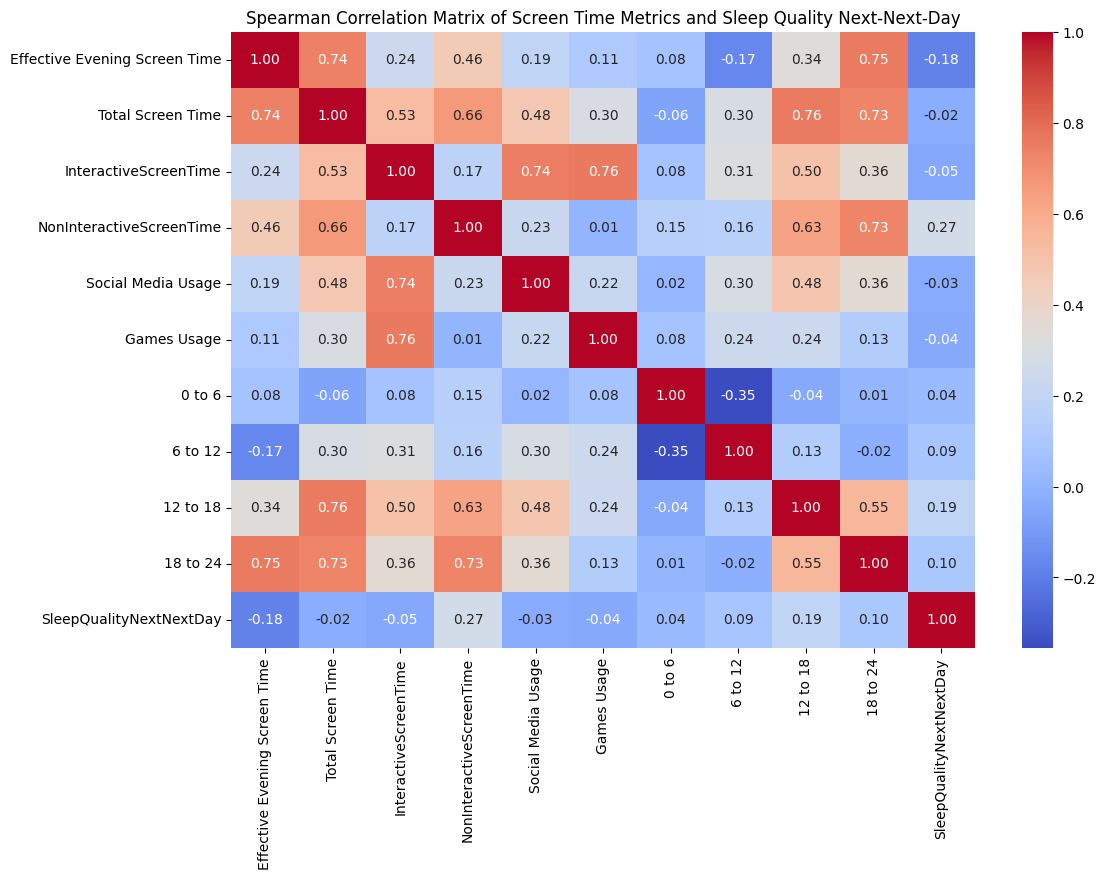

In [783]:
# Show correlational heatmap of all screen time metrics with Sleep Quality Next-Next-Day
plt.figure(figsize=(12, 8))
correlation_matrix = df[['Effective Evening Screen Time', 'Total Screen Time', 'InteractiveScreenTime', 'NonInteractiveScreenTime', 'Social Media Usage', 'Games Usage', '0 to 6', '6 to 12', '12 to 18', '18 to 24', 'SleepQualityNextNextDay']].corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix of Screen Time Metrics and Sleep Quality Next-Next-Day')
plt.show()

In [779]:
df['Steps'].describe()

count    8.900000e+01
mean    -1.315271e-16
std      1.005666e+00
min     -1.648826e+00
25%     -8.821826e-01
50%     -8.207931e-02
75%      8.513299e-01
max      2.716007e+00
Name: Steps, dtype: float64

In [780]:
# 2. MEAN-CENTERING (Critical for Moderation)
# Subtracting the mean makes the interaction term interpretable
df['TEST_centered'] = df['Effective Evening Screen Time'] - df['Effective Evening Screen Time'].mean()
df['Steps_centered'] = df['Steps'] - df['Steps'].mean()

# 3. CREATE INTERACTION TERM
df['Interaction'] = df['TEST_centered'] * df['Steps_centered']

# 4. FIT THE MODERATED ORDERED LOGISTIC REGRESSION
# Define predictors: Screens, Steps, and the Interaction
X = df[['TEST_centered', 'Steps_centered', 'Interaction']]
y = df['SleepQualityNextDay']

# Clean NaNs resulting from shifts
valid_idx = y.dropna().index.intersection(X.dropna().index)
X_clean = X.loc[valid_idx]
y_clean = y.loc[valid_idx]

mod_model = OrderedModel(y_clean, X_clean, distr='logit')
res = mod_model.fit(method='bfgs')

print(res.summary())

# Calculate and print odds ratios
params = res.params
odds_ratios = np.exp(params)
print("\nOdds Ratios:")
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 1.045919
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
                              OrderedModel Results                             
Dep. Variable:     SleepQualityNextDay   Log-Likelihood:                -93.087
Model:                    OrderedModel   AIC:                             198.2
Method:             Maximum Likelihood   BIC:                             213.1
Date:                 Sat, 14 Feb 2026                                         
Time:                         23:09:42                                         
No. Observations:                   89                                         
Df Residuals:                       83                                         
Df Model:                            3                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

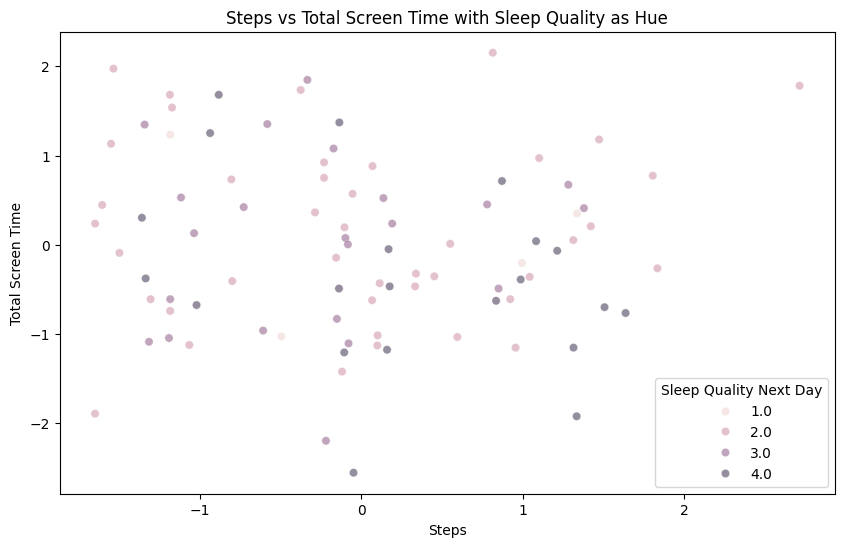

In [781]:
# Plot a scatter plot where steps is on the X-axis, total screen time is on the Y-axis, and the color of the points represents sleep quality. Add a regression line to show the interaction effect.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Steps', y='Total Screen Time', hue='SleepQualityNextDay', data=df, alpha=0.5)
plt.title('Steps vs Total Screen Time with Sleep Quality as Hue')
plt.xlabel('Steps')
plt.ylabel('Total Screen Time')
plt.legend(title='Sleep Quality Next Day')
plt.show()